In [19]:
%load_ext autoreload
%autoreload 2

In [20]:
from beavermap import BeaverMap
import os 

In [21]:
bm = BeaverMap(
    h5_file = './data/al2o3_m330p0/al2o3_m330p0.h5',
    poni_file = './data/m330p0.poni',
    mask_file = './data/mask.edf',
    chunk_size = 100,
    location = '1.1/measurement/eiger',
    nworkers = 1
)

In [22]:
#os.environ['OMP_NUM_THREADS'] = '1'
#max_sum = bm.max_sum()

In [23]:
#os.environ['OMP_NUM_THREADS'] = '10'
#max_sum = bm.max_sum()

In [24]:
#os.environ['OMP_NUM_THREADS'] = '1'
#bm.nworkers = 4 
#max_sum = bm.max_sum()

In [25]:
os.environ['OMP_NUM_THREADS'] = '1'
bm.nworkers = 10
#bm.n_images=600
integration = bm.integrate(regions = [[0,100],[0,3]],chunksize=300)

performing integration.0 300.0/300|100%|███████████████████████| 00:24<    00:00
Process ForkProcess-110:
performing integration.1 300.0/300|100%|███████████████████████| 00:23<    00:00
performing integration.2 300.0/300|100%|███████████████████████| 00:24<    00:00Process ForkProcess-128:
Process ForkProcess-129:
Process ForkProcess-130:

performing integration.3 300.0/300|100%|███████████████████████| 00:23<    00:00
performing integration.4 300.0/300|100%|███████████████████████| 00:23<    00:00Process ForkProcess-150:

performing integration.5 300.0/300|100%|███████████████████████| 00:23<    00:00Process ForkProcess-159:
Process ForkProcess-160:
Process ForkProcess-158:

performing integration.6 300.0/300|100%|███████████████████████| 00:25<    00:00
performing integration.7 300.0/300|100%|███████████████████████| 00:23<    00:00
performing integration.8 300.0/300|100%|███████████████████████| 00:24<    00:00Process ForkProcess-189:

performing integration.9 300.0/300|100%|██████

In [27]:
import numpy as np 
np.shape(integration)

(2, 60, 120)

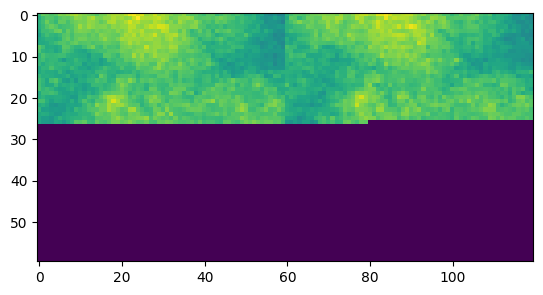

In [34]:
import matplotlib.pyplot as plt 
plt.imshow(integration[1])

In [44]:
    ranges =[
            (9, 13),             #XLPE/EVA
            (18.957, 19,357),
            (13.879, 14.103),    #Graphite
            (11.017, 11.068),    #SiO2
            (12.226, 12.396),
            (13.426, 13.603),
            (16.484, 16.660),
            (14.393, 14.793),    #NaCl
            (16.663, 17.063),
            (23.733, 24.133),
            (27.933, 28.333),
            (29.213, 29.613),
            (33.950, 34.250),
            (37.043, 37.443),
            (38.048, 38.448),
            (41.940, 42.200),
            (44.630, 44.859),
            (14.993, 15.173),     #KCl
            (21.303, 21.484),
            (25.169, 25.324),
            (26.124, 26.472),
            (15.522, 15.803),     #CaCO3
            (19.054, 19.154),
            (20.720, 20.948),
            (22.690, 22.815),
            (24.650, 24.812),
            (25.328, 25.596),
            (29.687, 29.917),
            (31.276, 31.910),
            (33.147, 33.501),
            (33.753, 33.946),
            (19.154, 19.368),     #ZnO
            (18.193, 18.464),
            (24.873, 25.117),
            (32.292, 32.617),
            (34.783, 35.007),
            (35.227, 35.568),
            (38.717, 39.275),
            (44.330, 44.574)
            ]

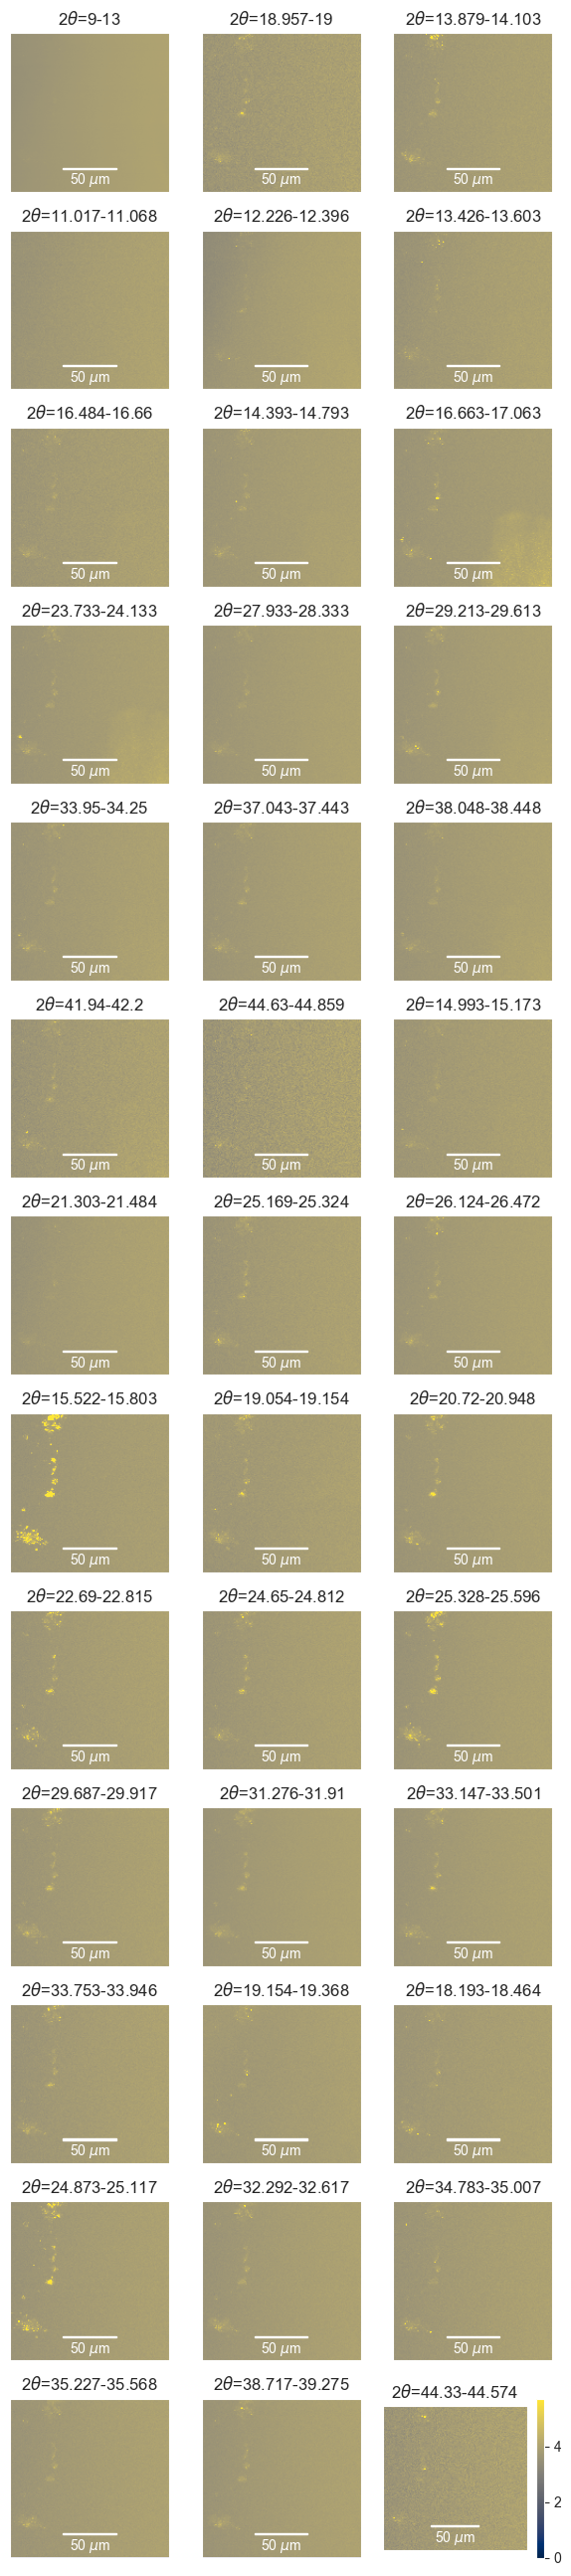

In [54]:
_data = np.load('/Users/badw/Desktop/mount2_b_t69_hv_00_00_integration.npy')
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


sns.set_style('dark')
fig,axes = plt.subplots(ncols=3,nrows=13,figsize=(6,26),dpi=100)
for i,ax in enumerate(axes.flatten()):
    avg = np.mean(_data[i])
    norm = Normalize(vmin=0,vmax=avg*1.5)

    im = ax.imshow(_data[i],cmap='cividis',aspect='equal',norm=norm,)

    #scalebar
    scalebar = AnchoredSizeBar(
        ax.transData,
                           50, '50 $\\mu$m', 'lower center', 
                           pad=0.1,
                           color='white',
                           frameon=False,
                           size_vertical=1,
    )#fontproperties=fontprops)

    ax.add_artist(scalebar)
    ax.set_title('2$\\theta$={}-{}'.format(ranges[i][0],ranges[i][1]))
    ax.set_xticklabels([]) ; ax.set_xticks([])
    ax.set_yticklabels([]) ; ax.set_yticks([])
fig.colorbar(im)



plt.tight_layout()
plt.show()